In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas_datareader.data import DataReader
import datetime
import pandas_datareader.data as web
from pandas.plotting import scatter_matrix
%matplotlib inline

In [ ]:
!pip install yfinance
import yfinance as yf

In [ ]:
start = "2015-9-01"
end = "2021-09-01"

In [ ]:
#
start_date = datetime.date(2016,1,1)
end_date = datetime.date(2021,1,1)
(end_date-start_date)


datetime.timedelta(days=1827)

In [ ]:
years= (end_date-start_date).days/365
years

5.005479452054795

In [ ]:
ticker = ["KOTAKBANK.NS", "HDFCBANK.NS","ICICIBANK.NS"]
data = yf.download(ticker,start,end)
data.head()


[*********************100%***********************]  3 of 3 completed


Adj Close               ...       Volume             
           HDFCBANK.NS ICICIBANK.NS  ... ICICIBANK.NS KOTAKBANK.NS
Date                                 ...                          
2015-09-01  483.381592   233.936768  ...     17342438      2257583
2015-09-02  480.989197   228.670059  ...     18825908      1747255
2015-09-03  488.311615   230.396866  ...     16509187      1835581
2015-09-04  481.424133   222.539963  ...     21605844      1696206
2015-09-07  475.817444   215.071609  ...     21698736      1236366

[5 rows x 18 columns]

In [ ]:
#Bottom 5
data.tail()

Adj Close               ...       Volume             
            HDFCBANK.NS ICICIBANK.NS  ... ICICIBANK.NS KOTAKBANK.NS
Date                                  ...                          
2021-08-25  1557.400024   691.049988  ...      9535359      2913810
2021-08-26  1554.800049   698.799988  ...     10756731      4382577
2021-08-27  1548.449951   699.750000  ...      9135827      3661315
2021-08-30  1568.250000   713.650024  ...     10797869      2561253
2021-08-31  1581.400024   719.049988  ...     19760246      4492609

[5 rows x 18 columns]

Text(0, 0.5, 'Share Price')

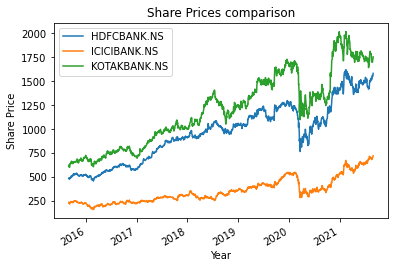

In [ ]:
#1 Adj close Plotting = > Current market Situation

data['Adj Close'].plot()
plt.title("Share Prices comparison")
plt.xlabel("Year")
plt.ylabel("Share Price")

Text(0, 0.5, 'Share Price')

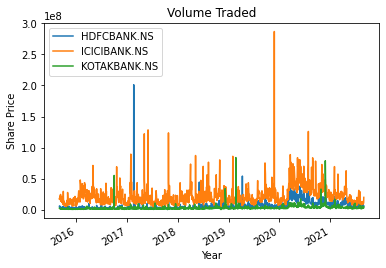

In [ ]:
#2 Volume Traded ==> Most Famous Stock ==> Most Preferred Stock==> ICICI Bank then HDFC 
data['Volume'].plot()
plt.title("Volume Traded")
plt.xlabel("Year")
plt.ylabel("Share Price")

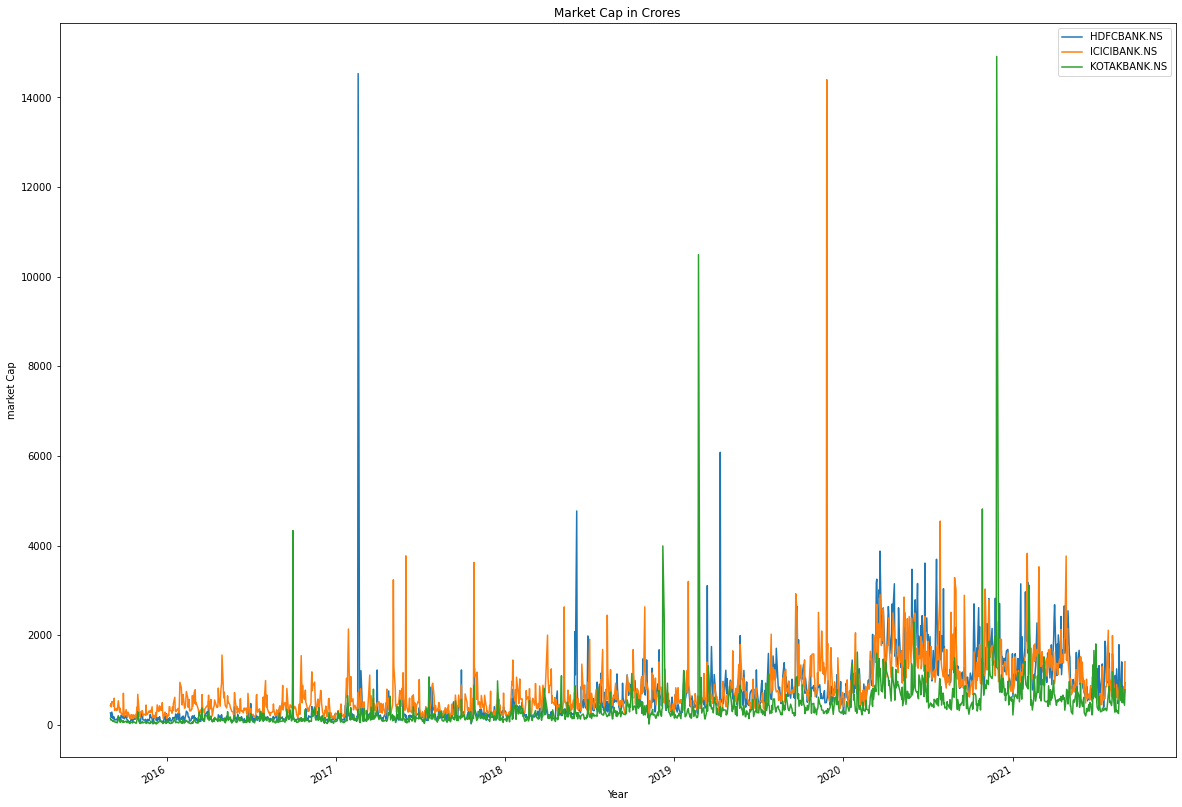

In [ ]:
#MarketCAP ==> 1. Blue is HDFC, 2. Orange is ICICI, 3. Green is Kotak

MarketCap = data['Open']*data['Volume']/10**7

MarketCap.plot(label= 'MarketCa', figsize=(20,15))
plt.title("Market Cap in Crores")
plt.xlabel("Year")
plt.ylabel("market Cap")
plt.legend()
plt.show()


In [ ]:
#Daily percentage Change
daily_returns2 = data['Adj Close'].pct_change()
daily_returns2*100


,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS
Date,,,
2015-09-01,NaN,NaN,NaN
2015-09-02,-0.494929,-2.251338,-0.822806
2015-09-03,1.522366,0.755152,3.022820
2015-09-04,-1.410469,-3.410161,-3.316850
2015-09-07,-1.164605,-3.355961,-0.931870
...,...,...,...
2021-08-25,-0.093014,-0.489600,-0.451644
2021-08-26,-0.166943,1.121482,0.017679
2021-08-27,-0.408419,0.135949,0.945511


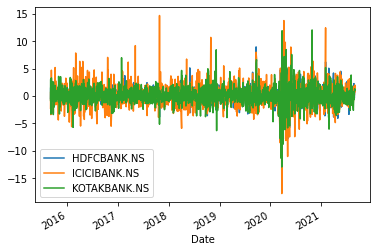

In [ ]:
#Volatility= Daily Stock price change percentage
#Inference = ICICI bank is the most volatile
drp = daily_returns2*100
drp.plot()

<Figure size 432x288 with 0 Axes>

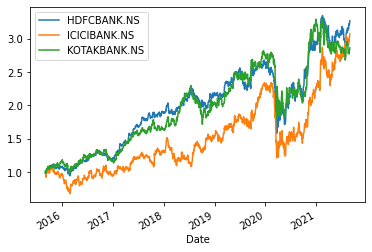

In [ ]:
#Cumulative Returns 

fig = plt.figure()
(daily_returns2 + 1).cumprod().plot()
plt.show()
#Hdfc bank is the most volatile



<Figure size 432x288 with 0 Axes>

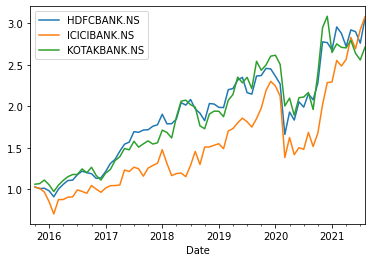

In [ ]:
#Performance of stocks(All starting from 1) over time on monthly timeframe

Monthly_returns2 = data['Adj Close'].resample('M').ffill().pct_change()
fig = plt.figure()
(Monthly_returns2 + 1).cumprod().plot()

plt.show()

In [ ]:
#Correlation between the closing price of Different Stocks 
# Inference = Does Change in one 
data['Adj Close'].corr()

,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS
HDFCBANK.NS,1.000000,0.934571,0.979016
ICICIBANK.NS,0.934571,1.000000,0.922642
KOTAKBANK.NS,0.979016,0.922642,1.000000


In [ ]:
#Correlation between the closing price returns of Different Stocks 
# Inference = Does Change in one stock price have any impact on another stock on daily basis?

daily_returns2.corr()

,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS
HDFCBANK.NS,1.000000,0.529658,0.632484
ICICIBANK.NS,0.529658,1.000000,0.440361
KOTAKBANK.NS,0.632484,0.440361,1.000000


In [ ]:
#Correlation between the closing price returns of Different Stocks 
# Inference = Does Change in one stock price have any impact on another stock on daily basis?

Monthly_returns2.corr()

,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS
HDFCBANK.NS,1.000000,0.685569,0.775035
ICICIBANK.NS,0.685569,1.000000,0.623099
KOTAKBANK.NS,0.775035,0.623099,1.000000


In [ ]:
#Correlation between the Traded Volume of Different Stocks 
# Inference = Does daily volumes have any impact on another stock on daily basis?
# ICICI Bank has some relation with HDFC bank
data['Volume'].corr()

,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS
HDFCBANK.NS,1.000000,0.407534,0.275253
ICICIBANK.NS,0.407534,1.000000,0.267687
KOTAKBANK.NS,0.275253,0.267687,1.000000


In [ ]:
#Volatility => Single Graph to represent volatilty?

returns = (dataKOTAKBANK.NS['Close']/data.KOTAKBANK.NS['Close'].shift(1))-1

returns.hist(bins= 100, label= "Volatility", alpha =0.5, figsize=(15,7))

plt.legend()
plt.show()

NameError: ignored

No handles with labels found to put in legend.


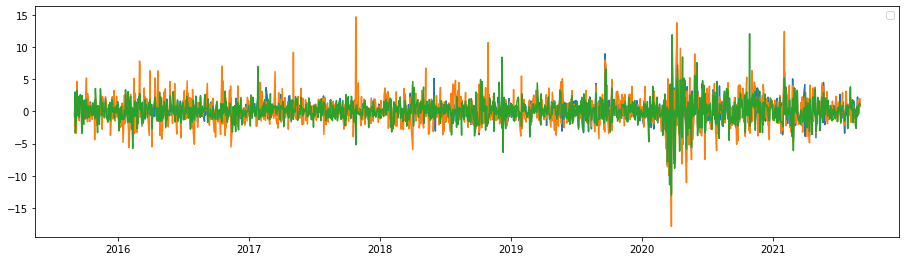

In [ ]:
# Daily returns => Volatility (But not clear)
# How to fix the issue of legend(They are not visible)
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,2,0.8])
ax1.plot(daily_returns2*100)


plt.legend()
plt.show()

No handles with labels found to put in legend.


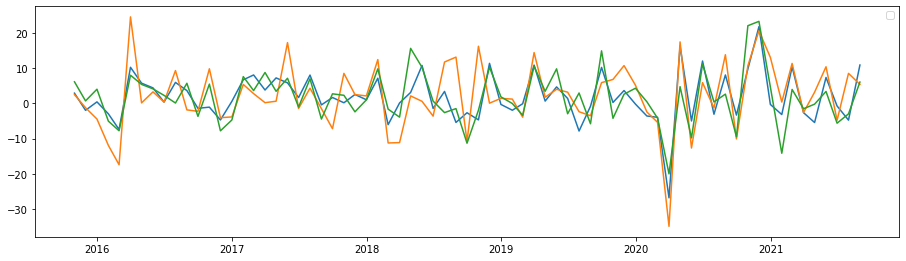

In [ ]:
#Monthly Volatility
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,2,0.8])
ax1.plot(Monthly_returns2*100)


plt.legend()
plt.show()

In [ ]:
daily_returns2.mean()*100

HDFCBANK.NS     0.091496
ICICIBANK.NS    0.101663
KOTAKBANK.NS    0.086816
dtype: float64

In [ ]:
 
 infos = []
 for i in ticker:
    infos.append(yf.Ticker(i).info)

In [ ]:
infos

[{'52WeekChange': 0.5097078,
  'SandP52WeekChange': 0.2525941,
  'address1': 'Bandra Kurla Complex',
  'address2': '27BKC, C 27 G Block Bandra (East)',
  'algorithm': None,
  'annualHoldingsTurnover': None,
  'annualReportExpenseRatio': None,
  'ask': 0,
  'askSize': 0,
  'averageDailyVolume10Day': 2190118,
  'averageVolume': 3650246,
  'averageVolume10days': 2190118,
  'beta': 0.668135,
  'beta3Year': None,
  'bid': 0,
  'bidSize': 0,
  'bookValue': 421.683,
  'category': None,
  'circulatingSupply': None,
  'city': 'Mumbai',
  'companyOfficers': [],
  'country': 'India',
  'currency': 'INR',
  'currentPrice': 2017.8,
  'currentRatio': None,
  'dateShortInterest': None,
  'dayHigh': 2025.5,
  'dayLow': 1985,
  'debtToEquity': None,
  'dividendRate': 0.9,
  'dividendYield': 0.0005,
  'earningsGrowth': -0.047,
  'earningsQuarterlyGrowth': -0.025,
  'ebitda': None,
  'ebitdaMargins': 0,
  'enterpriseToEbitda': None,
  'enterpriseToRevenue': 9.804,
  'enterpriseValue': 4094505254912,
  'e

In [ ]:
fundamentals= ['marketCap','trailingPE','priceToBook','returnOnEquity','profitMargins','operatingMargins','dividendYield','totalDebt','revenueGrowth','earningsGrowth']

#Buy @ 1000, Sell @ 1500
#Gross profit = 500
#EBITDA= earning before ITDA including other expenses like labour, rents
#Ebitda= 300


In [ ]:
df = pd.DataFrame(infos)
df

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,country,companyOfficers,website,maxAge,address1,fax,industry,address2,ebitdaMargins,profitMargins,grossMargins,operatingCashflow,revenueGrowth,operatingMargins,ebitda,targetLowPrice,recommendationKey,grossProfits,freeCashflow,targetMedianPrice,currentPrice,earningsGrowth,currentRatio,returnOnAssets,numberOfAnalystOpinions,targetMeanPrice,debtToEquity,returnOnEquity,targetHighPrice,totalCash,totalDebt,totalRevenue,totalCashPerShare,financialCurrency,...,navPrice,averageDailyVolume10Day,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,algorithm,dividendRate,exDividendDate,circulatingSupply,startDate,regularMarketDayLow,currency,trailingPE,regularMarketVolume,lastMarket,maxSupply,openInterest,marketCap,volumeAllCurrencies,strikePrice,averageVolume,dayLow,ask,askSize,volume,fiftyTwoWeekHigh,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,logo_url
0,400051,Financial Services,73000.0,"Kotak Mahindra Bank Limited, provides banking ...",Mumbai,91 22 6166 0001,India,[],http://www.kotak.com,1,Bandra Kurla Complex,91 22 6713 2403,Banks—Regional,"27BKC, C 27 G Block Bandra (East)",0,0.23809,0,None,0.170,0.31732,None,NaN,none,405885245000,None,NaN,2017.8,-0.047,None,NaN,NaN,NaN,None,NaN,NaN,366781792256,477388996608,417641299968,184.993,INR,...,None,2190118,2009.35,1908.2444,0.9,2008.00,None,2190118,None,None,0.9,1628640000,None,None,1985.00,INR,40.377804,1651848,None,None,None,4001479262208,None,None,3650246,1985.00,0,0,1651848,2077.8,None,None,1308.50,0,False,0.0005,0,2025.5,2017.8,https://logo.clearbit.com/kotak.com
1,400013,Financial Services,123473.0,HDFC Bank Limited provides various banking and...,Mumbai,91 22 6652 1000,India,[],http://www.hdfcbank.com,1,HDFC Bank House,91 22 24960737,Banks—Regional,Senapati Bapat Marg Lower Parel,0,0.40831,0,None,0.155,0.54849,None,1393.0,buy,777974049000,None,1800.0,1687.4,0.135,None,NaN,44.0,1770.32,None,0.16579,2078.0,1223041875968,1725907992576,804006133760,222.313,INR,...,None,5600626,1639.40,1585.1875,6.5,1638.00,None,5600626,None,None,6.5,1624924800,None,None,1638.00,INR,28.456272,7371364,None,None,None,9343893241856,None,None,6406736,1638.00,0,0,7371364,1690.0,None,None,1173.00,0,False,0.0040,0,1690.0,1687.4,https://logo.clearbit.com/hdfcbank.com
2,400051,Financial Services,NaN,ICICI Bank Limited provides various banking pr...,Mumbai,91 22 2653 1414,India,[],http://www.icicibank.com,1,ICICI Bank Towers,91 22 2653 1122,Banks—Regional,Bandra-Kurla Complex,0,0.19321,0,None,0.368,0.21677,None,460.0,strong_buy,966356348000,None,790.0,727.3,0.411,None,0.01442,45.0,788.07,None,0.14213,1000.0,420761894912,1371711602688,1035879317504,60.800,INR,...,None,9018166,709.95,712.3111,2.0,710.25,None,9018166,None,None,2.0,1627516800,None,None,709.05,INR,25.365326,8949481,None,None,None,5043934724096,None,None,11285250,709.05,0,0,8949481,735.4,None,None,388.05,0,False,0.0028,0,729.8,727.3,https://logo.clearbit.com/icicibank.com


In [ ]:
df= df.set_index('symbol')
df


,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,country,companyOfficers,website,maxAge,address1,fax,industry,address2,ebitdaMargins,profitMargins,grossMargins,operatingCashflow,revenueGrowth,operatingMargins,ebitda,targetLowPrice,recommendationKey,grossProfits,freeCashflow,targetMedianPrice,currentPrice,earningsGrowth,currentRatio,returnOnAssets,numberOfAnalystOpinions,targetMeanPrice,debtToEquity,returnOnEquity,targetHighPrice,totalCash,totalDebt,totalRevenue,totalCashPerShare,financialCurrency,...,navPrice,averageDailyVolume10Day,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,algorithm,dividendRate,exDividendDate,circulatingSupply,startDate,regularMarketDayLow,currency,trailingPE,regularMarketVolume,lastMarket,maxSupply,openInterest,marketCap,volumeAllCurrencies,strikePrice,averageVolume,dayLow,ask,askSize,volume,fiftyTwoWeekHigh,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,logo_url
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KOTAKBANK.NS,400051,Financial Services,73000.0,"Kotak Mahindra Bank Limited, provides banking ...",Mumbai,91 22 6166 0001,India,[],http://www.kotak.com,1,Bandra Kurla Complex,91 22 6713 2403,Banks—Regional,"27BKC, C 27 G Block Bandra (East)",0,0.23809,0,None,0.170,0.31732,None,NaN,none,405885245000,None,NaN,2017.8,-0.047,None,NaN,NaN,NaN,None,NaN,NaN,366781792256,477388996608,417641299968,184.993,INR,...,None,2190118,2009.35,1908.2444,0.9,2008.00,None,2190118,None,None,0.9,1628640000,None,None,1985.00,INR,40.377804,1651848,None,None,None,4001479262208,None,None,3650246,1985.00,0,0,1651848,2077.8,None,None,1308.50,0,False,0.0005,0,2025.5,2017.8,https://logo.clearbit.com/kotak.com
HDFCBANK.NS,400013,Financial Services,123473.0,HDFC Bank Limited provides various banking and...,Mumbai,91 22 6652 1000,India,[],http://www.hdfcbank.com,1,HDFC Bank House,91 22 24960737,Banks—Regional,Senapati Bapat Marg Lower Parel,0,0.40831,0,None,0.155,0.54849,None,1393.0,buy,777974049000,None,1800.0,1687.4,0.135,None,NaN,44.0,1770.32,None,0.16579,2078.0,1223041875968,1725907992576,804006133760,222.313,INR,...,None,5600626,1639.40,1585.1875,6.5,1638.00,None,5600626,None,None,6.5,1624924800,None,None,1638.00,INR,28.456272,7371364,None,None,None,9343893241856,None,None,6406736,1638.00,0,0,7371364,1690.0,None,None,1173.00,0,False,0.0040,0,1690.0,1687.4,https://logo.clearbit.com/hdfcbank.com
ICICIBANK.NS,400051,Financial Services,NaN,ICICI Bank Limited provides various banking pr...,Mumbai,91 22 2653 1414,India,[],http://www.icicibank.com,1,ICICI Bank Towers,91 22 2653 1122,Banks—Regional,Bandra-Kurla Complex,0,0.19321,0,None,0.368,0.21677,None,460.0,strong_buy,966356348000,None,790.0,727.3,0.411,None,0.01442,45.0,788.07,None,0.14213,1000.0,420761894912,1371711602688,1035879317504,60.800,INR,...,None,9018166,709.95,712.3111,2.0,710.25,None,9018166,None,None,2.0,1627516800,None,None,709.05,INR,25.365326,8949481,None,None,None,5043934724096,None,None,11285250,709.05,0,0,8949481,735.4,None,None,388.05,0,False,0.0028,0,729.8,727.3,https://logo.clearbit.com/icicibank.com


In [ ]:
df.columns.isin(fundamentals)      #Checking whether columns in df lie in fundamental or not 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [ ]:
df.columns[df.columns.isin(fundamentals)] #Calling the columns according to true false


Index(['profitMargins', 'revenueGrowth', 'operatingMargins', 'earningsGrowth',
       'returnOnEquity', 'totalDebt', 'priceToBook', 'trailingPE', 'marketCap',
       'dividendYield'],
      dtype='object')

In [ ]:
df[df.columns[df.columns.isin(fundamentals)]]

,profitMargins,revenueGrowth,operatingMargins,earningsGrowth,returnOnEquity,totalDebt,priceToBook,trailingPE,marketCap,dividendYield
symbol,,,,,,,,,,
KOTAKBANK.NS,0.23809,0.170,0.31732,-0.047,NaN,477388996608,4.785111,40.377804,4001479262208,0.0005
HDFCBANK.NS,0.40831,0.155,0.54849,0.135,0.16579,1725907992576,4.243345,28.456272,9343893241856,0.0040
ICICIBANK.NS,0.19321,0.368,0.21677,0.411,0.14213,1371711602688,3.095776,25.365326,5043934724096,0.0028


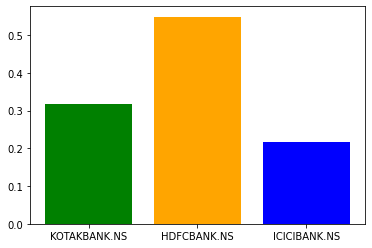

In [ ]:
#Comparison in terms of Operating Margins
plt.bar(df.index,df.operatingMargins, color=('green','orange','blue'))
plt.show()
#Inference: HDFC Bank has the highest Operating margins

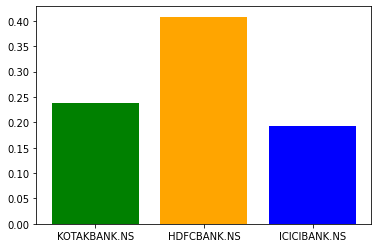

In [ ]:
#Comapriosn in terms of profit Margins
plt.bar(df.index,df.profitMargins, color=('green','orange','blue'))
plt.show()
#Inference: HDFC Bank has the highest profit margin

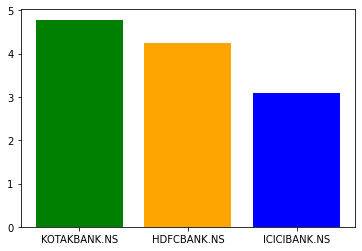

In [ ]:
#Comparison in terms of PB ratio
plt.bar(df.index,df.priceToBook, color=('green','orange','blue'))
plt.show()

#ICICI bank is the cheapest amongst these in terms of PB ratio

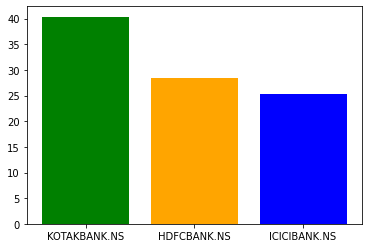

In [ ]:
#Comparison in terms of PE ratio
plt.bar(df.index,df.trailingPE, color=('green','orange','blue'))
plt.show()

#ICICI bank is the cheapest amongst these in terms of PE ratio

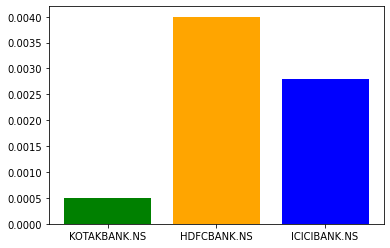

In [ ]:
#Highest Dividend Payer
plt.bar(df.index,df.dividendYield, color=('green','orange','blue'))
plt.show()

#HDFC bank is the highest dividend payer

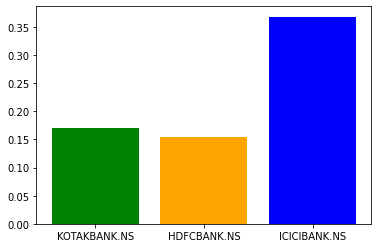

In [ ]:
#Highest Revenue Growth

plt.bar(df.index,df.revenueGrowth, color=('green','orange','blue'))
plt.show()

#ICICI Bank has the highest revenue Growth

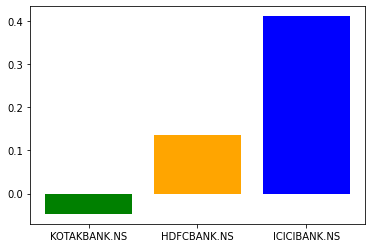

In [ ]:
#Highest earnings Growth

plt.bar(df.index,df.earningsGrowth, color=('green','orange','blue'))
plt.show()

#ICICI Bank has the highest earnings Growth

In [ ]:
#All Inferences
#Operating Margins- HDFC bank has the highest operating Margin
#profit margin: HDFC Bank has the highest profit margin
#PB ratio: ICICI bank is the cheapest amongst these in terms of PB ratio
#PE ratio: ICICI bank is the cheapest amongst these in terms of PE ratio
#dividend: HDFC bank is the highest dividend payer
#revenue Growth: ICICI Bank has the highest revenue Growth
#Earnings Growth: ICICI Bank has the highest earnings Growth


#In all for a good CAGR of 14-15% one can invest in HDFC
# For Wealth creation, one can go for ICICI as it is very undervalued. 